## Word sim using Word2Vec

In [271]:
import logging
import numpy as np  
from gensim.models import Word2Vec
import os
import codecs

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.ERROR)

In [2]:
w2v = Word2Vec.load("/home/laampt/nlp/xnews/model2/xnews_w2v_sg10_hs_d100_5mw_r20")

In [3]:
print w2v

Word2Vec(vocab=109240, size=100, alpha=0.025)


In [5]:
print '='*79
print '{:79s}'.format("EVALUATION MODEL")
print '='*79

print u"1. Cha và Mẹ: {:.2f}\n".format(w2v.similarity(u'cha', u'mẹ'))

print u"2. Cá và Nước: {:.2f}\n".format(w2v.similarity(u'cá', u'nước'))

print u"2. Chồng và Vợ: {:.2f}\n".format(w2v.similarity(u'chồng', u'vợ'))

print u"3. Not the same: Xe Tàu Người is: {}\n".format(w2v.doesnt_match(u"xe tàu người".split()))

print u"4. Most sim of Giàu"
for w, v in w2v.most_similar(positive=[u'giàu'], topn=5):
    print w, v

print

print u"5. Vector Hà_Nội - Việt_Nam + Bắc_Kinh"
for w, v in w2v.most_similar(positive=[u'hà_nội', u'bắc_kinh'], negative=[u'việt_nam']):
    print w, v

print 

print u"6. Most sim of Dân_Tộc"
for w, v in w2v.most_similar(positive=[u'dân_tộc'], topn=5):
    print w, v

print

print "Cộng_Hòa Xã_Hội Việt_Nam + Độc_Lập Tự_Do Hạnh_Phúc: {}".format(w2v.n_similarity(u"cộng_hòa xã_hội việt_nam".split(), u"độc_lập tự_do hạnh_phúc".split()))

EVALUATION MODEL                                                               
1. Cha và Mẹ: 0.78

2. Cá và Nước: 0.55

2. Chồng và Vợ: 0.95

3. Not the same: Xe Tàu Người is: tàu

4. Most sim of Giàu
giàu_có 0.692522883415
một_phần 0.688655734062
ít 0.674273431301
hơn_cả 0.670530796051
điển_hình 0.669650793076

5. Vector Hà_Nội - Việt_Nam + Bắc_Kinh
hàng_châu 0.640709578991
daily 0.637070536613
scmp 0.633349299431
thượng_hải 0.627284169197
vũ_hán 0.621672391891
chinanews 0.618384122849
chiết_giang 0.614068865776
hồ_bắc 0.612775325775
giang_tô 0.611639618874
cfp 0.603561520576

6. Most sim of Dân_Tộc
thiểu_số 0.774215519428
đồng_bào 0.739377856255
cội_nguồn 0.726256787777
bản_sắc 0.722493112087
tày 0.693713486195

Cộng_Hòa Xã_Hội Việt_Nam + Độc_Lập Tự_Do Hạnh_Phúc: 0.630330179932


In [7]:
for w,v in w2v.most_similar(u"huế"):
    print w, v

thiên_huế 0.72513371706
thừa_thiên 0.71650147438
cố_đô 0.713376641273
hội_an 0.711821436882
đà_nẵng 0.693230688572
quảng_nam 0.689181804657
đại_nội 0.671301484108
thừa_thiên_huế 0.666995763779
quảng 0.658697009087
hương_thủy 0.622586131096


In [12]:
for w,v in w2v.most_similar([u"nổi_tiếng", u"nghệ_sĩ", u"cải_lương"]):
    print w, v

sân_khấu 0.805678725243
biểu_diễn 0.791657209396
kịch_nói 0.791352570057
nhạc_kịch 0.785590410233
nghệ_thuật 0.78185158968
âm_nhạc 0.775562226772
ca_nhạc 0.766978740692
nhà_hát 0.761157155037
công_diễn 0.756360292435
nsưt 0.755988717079


## Word theme using LDA topics

In [15]:
for w,v in w2v.most_similar(u"tin_tức", topn=20):
    print w, v

báo 0.724770605564
facebook_twitter 0.712914586067
trang_chủ 0.69758450985
đăng_tải 0.69701141119
mạng 0.683282971382
twitter 0.678319573402
new_york_times 0.675285041332
phóng_viên 0.673476994038
cập_nhật 0.667495727539
bản_tin 0.666581988335
đăng 0.664984762669
theo_dõi 0.659540593624
tờ_báo 0.658765435219
guardian 0.658398270607
đưa_tin 0.649848818779
bình_luận 0.649312376976
wall_street_journal 0.647682964802
tin 0.646629869938
facebook 0.646061420441
phản_hồi 0.644473612309


In [37]:
import gensim

dictionary = gensim.corpora.Dictionary.load('/home/laampt/nlp/xnews/model2/xnews.280Kdoc.dict')
corpus = gensim.corpora.MmCorpus('/home/laampt/nlp/xnews/model2/xnews.tfidfcorpus.mm')
lda = gensim.models.ldamodel.LdaModel.load('/home/laampt/nlp/xnews/model2/xnews.lda10.mm2')

In [38]:
print dictionary
print corpus
print lda

Dictionary(87893 unique tokens: [u'b\u1ea3o_th\u1ea1ch', u'to_s\u1ee5', u'bulgary', u'megumi_yokota', u'_n\u01b0\u1edbc']...)
MmCorpus(283346 documents, 87893 features, 43337447 non-zero entries)
LdaModel(num_terms=87893, num_topics=10, decay=0.5, chunksize=10000)


In [39]:
lda = gensim.models.ldamodel.LdaModel.load('/home/laampt/nlp/xnews/model2/xnews.lda10.mm2')
print "LDA 10\n"
print '\n\n'.join(lda.print_topics(num_topics=10))

LDA 10

0.007*xe + 0.005*i + 0.005*mẫu + 0.005*màn_hình + 0.005*phone + 0.005*smartphone + 0.005*chiếc + 0.005*hãng + 0.005*động_cơ + 0.005*thiết_kế

0.014*tàu + 0.013*biển + 0.009*đảo + 0.006*cá + 0.005*bão + 0.005*ebola + 0.005*nhiễm + 0.004*ngư_dân + 0.004*thuyền + 0.004*virus

0.015*man + 0.012*trận + 0.011*utd + 0.009*world_cup + 0.008*chelsea + 0.007*brazil + 0.006*cầu_thủ + 0.006*đội_bóng + 0.006*vô_địch + 0.006*liverpool

0.004*khu + 0.004*dự_án + 0.004*cây + 0.003*sông + 0.003*cầu + 0.003*du_khách + 0.003*đường + 0.003*công_trình + 0.003*xây_dựng + 0.003*trồng

0.006*mỹ + 0.006*trung_quốc + 0.005*nga + 0.004*máy_bay + 0.004*tổng_thống + 0.003*ông + 0.003*usd + 0.003*cuộc + 0.003*nước + 0.003*thế_giới

0.016*aud + 0.011*ila + 0.009*cntt + 0.006*đại_tướng + 0.005*bank + 0.004*ait + 0.004*go + 0.004*võ_nguyên_giáp + 0.004*guardiola + 0.003*a1

0.006*bạn + 0.005*tôi + 0.004*em + 0.003*anh + 0.003*con + 0.003*bé + 0.003*ấy + 0.003*cô + 0.002*mình + 0.002*mẹ

0.006*công_an + 0.005*x

In [ ]:
lda = gensim.models.ldamodel.LdaModel.load('/home/laampt/nlp/xnews/model2/xnews.lda15.mm2')
print "LDA 15\n"
print '\n\n'.join(lda.print_topics(num_topics=15))

In [ ]:
lda = gensim.models.ldamodel.LdaModel.load('/home/laampt/nlp/xnews/model2/xnews.lda20.mm2')
print "LDA 20\n"
print '\n\n'.join(lda.print_topics(num_topics=20))

In [ ]:
lda = gensim.models.ldamodel.LdaModel.load('/home/laampt/nlp/xnews/model2/xnews.lda25.mm2')
print "LDA 25\n"
print '\n\n'.join(lda.print_topics(num_topics=25))

In [ ]:
lda = gensim.models.ldamodel.LdaModel.load('/home/laampt/nlp/xnews/model2/xnews.lda50.mm2')
print "LDA 50\n"
print '\n\n'.join(lda.print_topics(num_topics=50))

## pyLDAVis

In [45]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
from sklearn.externals import joblib

In [46]:
%%time
lda = gensim.models.ldamodel.LdaModel.load('/home/laampt/nlp/xnews/model2/xnews.lda10.mm2')
vis_data = gensimvis.prepare(lda, corpus, dictionary)
joblib.dump(vis_data, "/home/laampt/nlp/xnews/model2/pyldavis10.pkl")

CPU times: user 7min 26s, sys: 3.44 s, total: 7min 29s
Wall time: 7min 43s


In [47]:
pyLDAvis.display(vis_data)

In [48]:
%%time
lda = gensim.models.ldamodel.LdaModel.load('/home/laampt/nlp/xnews/model2/xnews.lda15.mm2')
vis_data = gensimvis.prepare(lda, corpus, dictionary)
joblib.dump(vis_data, "/home/laampt/nlp/xnews/model2/pyldavis15.pkl")

CPU times: user 7min 46s, sys: 2.93 s, total: 7min 49s
Wall time: 7min 59s


In [49]:
pyLDAvis.display(vis_data)

In [50]:
%%time
lda = gensim.models.ldamodel.LdaModel.load('/home/laampt/nlp/xnews/model2/xnews.lda20.mm2')
vis_data = gensimvis.prepare(lda, corpus, dictionary)
joblib.dump(vis_data, "/home/laampt/nlp/xnews/model2/pyldavis20.pkl")

CPU times: user 7min 41s, sys: 2.88 s, total: 7min 43s
Wall time: 7min 58s


In [51]:
pyLDAvis.display(vis_data)

## Word map on newswire

In [53]:
lda = gensim.models.ldamodel.LdaModel.load('/home/laampt/nlp/xnews/model2/xnews.lda10.mm2')

In [77]:
def get_topic_prob(key_word, dictionary=dictionary):
    return sorted(lda.get_document_topics(dictionary.doc2bow([key_word])), key=lambda x: x[1], reverse=True)[0]

get_topic_prob(key_word)

(4, 0.54998893847809338)

In [63]:
print lda.print_topic(4)

0.006*mỹ + 0.006*trung_quốc + 0.005*nga + 0.004*máy_bay + 0.004*tổng_thống + 0.003*ông + 0.003*usd + 0.003*cuộc + 0.003*nước + 0.003*thế_giới


In [68]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [69]:
v_kw = w2v[key_word]
v_1st = w2v[u"báo"]

print w2v.similarity(key_word, u"báo")
print cosine_similarity([v_kw, v_1st])

0.724770746139
[[ 0.99999994  0.72477061]
 [ 0.72477061  1.        ]]


In [78]:
key_word = u"tin_tức"

names = [key_word]
sim_vs = [w2v[key_word]]
sims = [1]
labels = [get_topic_prob(key_word)[0]]
for w,v in w2v.most_similar(key_word, topn=100):
    sim_vs += [w2v[w]]
    names += [w]
    sims += [v]
    labels += [get_topic_prob(w)[0]]
    
dist_vs = 1 - cosine_similarity(sim_vs)

In [83]:
print len(names)
print len(sims)
print len(labels)
print dist_vs.shape
print dist_vs[0,0]
print dist_vs[0,1]
print names[1], labels[1], sims[1]

101
101
101
(101, 101)
0.0
0.275229
báo 7 0.724770605564


In [104]:
#set up colors per clusters using a dict
colors = ['#' + ii.strip() for ii in '348ABD, A60628, 7A68A6, 467821, D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2'.split(',')]
topic_colors = dict(enumerate([colors[ii] for ii in range(10)]))
topics_names = dict(enumerate(["blog", "world", "criminals", "edu", "vietnam", "biz", "tech", "health", "sport", "social"]))

In [180]:
colors2 = np.linspace(0.12,0.89,10)
topic_colors2 = dict(enumerate(colors2))
print colors2

[ 0.12        0.20555556  0.29111111  0.37666667  0.46222222  0.54777778
  0.63333333  0.71888889  0.80444444  0.89      ]


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.style.use("ggplot")

In [92]:
df = pd.DataFrame(dict(names=names, sims=sims, topics=labels))

In [93]:
df.head()

,names,sims,topics
0,tin_tức,1.000000,4
1,báo,0.724771,7
2,facebook_twitter,0.712915,9
3,trang_chủ,0.697585,9
4,đăng_tải,0.697011,4


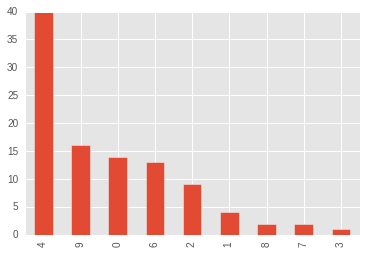

In [95]:
p = df.topics.value_counts().plot(kind='bar')

## Projection 2D

In [96]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=127)

pos = mds.fit_transform(dist_vs)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [97]:
df['x'] = xs
df['y'] = ys

In [105]:
df['labels'] = df.topics.map(topics_names)

In [181]:
df['colors'] = df.topics.map(topic_colors2)

In [204]:
df.head()

,names,sims,topics,x,y,labels,colors
0,tin_tức,1.000000,4,0.001728,0.036180,vietnam,0.462222
1,báo,0.724771,7,-0.032109,0.011445,health,0.718889
2,facebook_twitter,0.712915,9,0.059239,-0.240649,social,0.890000
3,trang_chủ,0.697585,9,-0.000491,-0.114792,social,0.890000
4,đăng_tải,0.697011,4,-0.097034,-0.077865,vietnam,0.462222


In [108]:
import mpld3

#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [116]:
#group by cluster
groups = df.groupby('topics')

In [221]:
#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(18,10)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for topic_id, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=16, 
                     label=topics_names[topic_id], mec='none', alpha=0.8,
                     color=topic_colors[topic_id]
                    )
    ax.set_aspect('auto')
    labels = [i for i in group.names]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot
ax.grid(color='white', linestyle='')
ax.set_title(u"Top 100 word related with {}".format(key_word), size=16) 
mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

In [273]:
fig, ax = plt.subplots(figsize=(18,10), subplot_kw=dict(axisbg='#EEEEEE'))
# formatter = plt.FuncFormatter(lambda i, *args: topics_names[int(i)])

scatter = ax.scatter(df['x'].values,
                     df['y'].values,
                     c=df.topics,
                     s=1000 * df['sims'].values,
                     alpha=0.6,
                     cmap=plt.cm.get_cmap('rainbow', 10))

labels = list(df['names'].values)
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

# plot keyword text
plt.text(df[df.names==key_word]['x'].values[0]+.02, df[df.names==key_word]['y'].values[0], key_word, ha = 'right', va = 'bottom')

# plt.colorbar(ticks=range(10), format=formatter)
ax.legend(numpoints=1) #show legend with only one dot
ax.grid(color='white', linestyle='')
ax.set_title(u"Top 100 word related with {}".format(key_word), size=14) 
mpld3.display() #show the plot

In [291]:
fig, ax = plt.subplots(figsize=(18,10), subplot_kw=dict(axisbg='#EEEEEE'))

elements = []
for topic in range(lda.num_topics):
    scatter = ax.scatter(df[df.topics==topic]['x'].values,
                         df[df.topics==topic]['y'].values,
                         c=next(ax._get_lines.color_cycle),
                         s=1000 * df['sims'].values,
                         label=topics_names[topic],
                         alpha=0.6,
                         cmap=plt.cm.get_cmap('rainbow', 10))
    

    labels = list(df[df.topics==topic]['names'].values)
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
    elements.append([scatter])
    

# plot keyword text
plt.text(df[df.names==key_word]['x'].values[0]+.02, df[df.names==key_word]['y'].values[0], key_word, ha = 'right', va = 'bottom')

# adding legend
# labels = [u"{}".format(i) for i in range(lda.num_topics)]
# mpld3.plugins.connect(fig, mpld3.plugins.(elements, labels))
# ax.legend(scatterpoints=1,loc='best')

ax.grid(color='white', linestyle='')
ax.set_title(u"MDS: Top 100 word related with {}".format(key_word), size=14) 
mpld3.display() #show the plot

In [258]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [259]:
%autoreload 2

## TSNE projection

In [275]:
from tsne import tsne

In [ ]:
tsnemat = tsne(np.asfarray(dist_vs))

In [280]:
df['x2'] = tsnemat[:,0]
df['y2'] = tsnemat[:,1]

df.head()

,names,sims,topics,x,y,labels,colors,x2,y2
0,tin_tức,1.000000,4,0.001728,0.036180,vietnam,0.462222,-1.470002,2.007801
1,báo,0.724771,7,-0.032109,0.011445,health,0.718889,-3.393911,-0.815473
2,facebook_twitter,0.712915,9,0.059239,-0.240649,social,0.890000,-3.953456,19.186787
3,trang_chủ,0.697585,9,-0.000491,-0.114792,social,0.890000,-4.542126,7.284897
4,đăng_tải,0.697011,4,-0.097034,-0.077865,vietnam,0.462222,-8.100963,1.917095


In [298]:
fig, ax = plt.subplots(figsize=(18,10), subplot_kw=dict(axisbg='#EEEEEE'))

elements = []
for topic in range(lda.num_topics):
    scatter = ax.scatter(df[df.topics==topic]['x2'].values,
                         df[df.topics==topic]['y2'].values,
                         c=next(ax._get_lines.color_cycle),
                         s=1000 * df['sims'].values,
                         label=topics_names[topic],
                         alpha=0.6,
                         cmap=plt.cm.get_cmap('rainbow', 10))
    

    labels = list(df[df.topics==topic]['names'].values)
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
    elements.append([scatter])
    

# plot keyword text
plt.text(df[df.names==key_word]['x2'].values[0], df[df.names==key_word]['y2'].values[0], key_word, ha = 'right', va = 'bottom', size=14)

# adding legend
# labels = [u"{}".format(i) for i in range(lda.num_topics)]
# mpld3.plugins.connect(fig, mpld3.plugins.(elements, labels))
# ax.legend(scatterpoints=1,loc='best')

ax.grid(color='white', linestyle='')
ax.set_title(u"TSNE: Top 100 word related with {}".format(key_word), size=14) 
mpld3.display() #show the plot

In [294]:
#uncomment the below to export to html
html = mpld3.fig_to_html(fig)

In [296]:
from IPython.display import display, HTML

In [ ]:
HTML(data=html)